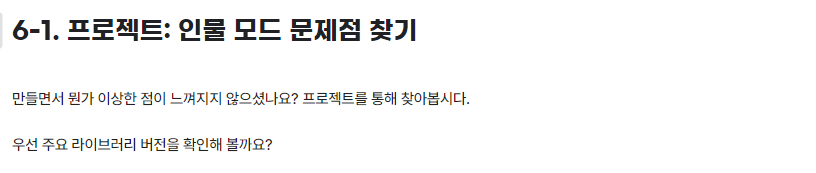

In [1]:
# importlib: 사용자가 파이썬의 import 시스템과 상호작용하기 위한 API를 제공하는 내장 라이브러리
# 사용자는 import 함수의 구현 내용과, 실행에 필요한 하위 함수들을 이용해 필요에 맞는 임포터를 직접 구현하거나 임포트 관련 기능들을 자유롭게 사용할 수 있음
# importlib.metadata: 설치된 패키지 메타 데이터에 대한 접근을 제공하는 라이브러리.
# 해당 코드 블럭에서는 importlib.metadata 안에 있는 version() 함수를 이용하여 pixellib 라이브러리의 버전을 확인

from importlib.metadata import version
import cv2
import pixellib

print(cv2.__version__)
print(version('pixellib'))

4.5.3
0.7.1


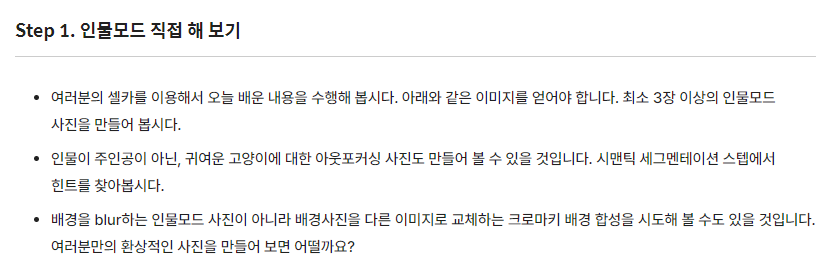

In [2]:
# os: Operating System의 줄임말로, 운영체제에서 제공되는 여러 기능을 파이썬에서 사용할 수 있도록 함 (Ex. 디렉토리 경로 이동, 시스템 환경 변수 가져오기 등)
# urllib: URL 작업을 위한 여러 모듈을 모은 패키지. (Ex. urllib.request, urllib.parse, ...)
# cv2: OpenCV 라이브러리로, 실시간 컴퓨터 비전을 목적으로 한 프로그래밍 라이브러리
# numpy(NumPy): 행렬이나 대규모 다차원 배열을 쉽게 처리할 수 있도록 지원하는 라이브러리. 데이터 구조 외에도 수치 계산을 위해 효율적으로 구현된 기능을 제공
# pixellib: 이미지 및 비디오 segmentation을 수행하기 위한 라이브러리. 
# pixellib.semantic: segmentation 기법 중, semantic segmentation을 쉽게 사용할 수 있도록 만든 라이브러리
# matplotlib: 파이썬 프로그래밍 언어 및 수학적 확장 NumPy 라이브러리를 활용한 플로팅 라이브러리로, 데이터 시각화 도구
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt


In [6]:
# os 모듈에 있는 getenv() 함수를 이용하여 읽고싶은 파일의 경로를 file_path에 저장
# 준비한 이미지 파일의 경로를 이용하여, 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/KakaoTalk_20240109_113309155.jpg '
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
# plt.show(): 현재 열려있는 모든 figure를 표시 (여기서 figure는 이미지, 그래프 등)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

AttributeError: 'NoneType' object has no attribute 'shape'

In [7]:
# 파일이 실제로 존재하는지 확인
if os.path.exists(img_path):
    img_orig = cv2.imread(img_path)
    print(img_orig.shape)
else:
    print(f"파일이 존재하지 않습니다: {img_path}")

파일이 존재하지 않습니다: /aiffel/aiffel/human_segmentation/images/KakaoTalk_20240109_113309155.jpg 


(2560, 1920, 3)


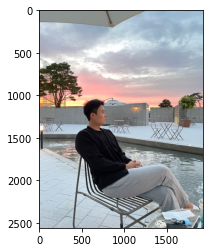

In [3]:
import cv2
import os
#위에 이미지의 경로설정중 환경변수와 경로 문제로 이미지가 불러와지지않아 join을 사용하여 다시 경로 설정함

# 경로를 명확하게 지정하기 위해 raw string을 사용하거나 슬래시를 사용합니다.
img_path = os.path.join(os.getenv('HOME'), 'aiffel', 'human_segmentation', 'images', 'KakaoTalk_20240109_113309155.jpg')

# 파일이 실제로 존재하는지 다시 확인합니다.
if os.path.isfile(img_path):
    img_orig = cv2.imread(img_path)
    if img_orig is not None:
        print(img_orig.shape)
    else:
        print("이미지를 읽을 수 없습니다. 파일 형식을 확인하거나 OpenCV 설치를 확인하세요.")
else:
    print(f"파일이 존재하지 않습니다: {img_path}")
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))#cv2.cvtColor를 통해 BRG 형태를 RGB형태로 바꿈..
plt.show()

In [4]:
#환경변수는 맞게 설정되있는거같은대 왜  못불러왔는지 아직 의문,...
home_path = os.getenv('HOME')
print(home_path)

/aiffel


In [5]:
# 저장할 파일 이름을 결정합니다
# 1. os.getenv(x)함수는 환경 변수x의 값을 포함하는 문자열 변수를 반환합니다. model_dir 에 "/aiffel/human_segmentation/models" 저장
# 2. #os.path.join(a, b)는 경로를 병합하여 새 경로 생성 model_file 에 "/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5" 저장
# 1
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다(이미 학습된 모델을 불러와서 지정한 모델파일에 저장)
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f754c323100>)

In [6]:
model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file) # pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출

In [7]:
segvalues, output = model.segmentAsPascalvoc(img_path) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용

In [8]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

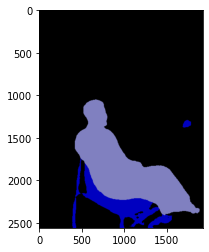

In [9]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

In [10]:
segvalues # segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력

{'class_ids': array([ 0,  9, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [11]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
person


In [12]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!
#각 채널이 8비트를 사용하여 색상을 표현하기 때문에, 가능한 색상의 총 개수는 (2^8 = 256) 가지입니다.
#각 색상값의 범위는 0부터 255까지, 각 색상의 수는 256가지
#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [13]:
#각각 segvalues, output = model.segmentAsPascalvoc(img_path)를 통해 분리된 이미지안의 객체들의 레이블값에 따라 픽셀값이 다르게 저장(각각 객체들 픽셀단위로 구분)
print(colormap[15]) #컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)
print(colormap[9]) #컬러맵 9에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 9번째인 의자)
print(colormap[0]) #컬러맵 0에 해당하는 배열 출력()pacalvoc에 LABEL_NAMES 0번째인 배경)

[192 128 128]
[192   0   0]
[0 0 0]


In [16]:
#opencv라이브러리는 기본적으로brg의 형태로 이미지의 채널을 처리한다. 따라서 다른 기본적으로 rgb의 형태로 이미지의 채널을 처리할려면 brg형태를rgb형태로 바꿔주어야함
#colormap은 256가지의 색상의 수를 갖고 각 색상은 rgb의 3개의 채널을 통해 나타냄으로 (256,3)의 크기를 갖는 2차원 배열이다.
# colormap = colormap[:, ::-1]  # RGB를 BGR 순서로 뒤집습니다.
# colormap.shape
#colormap = colormap[:, ::-1]  # RGB를 BGR 순서로 뒤집어서 실행하려고했으나 사람의 픽셀을 인식을 못하고 모두 검은색으로 출력되어 찾아보았더니
#위에서 이미 cv2.cvtColor를 통해 BRG 형태를 RGB형태로 바꿨기때문에 따로 colormap을 뒤집에 rgb로 바꿀필요가 없었다.
#그래도 colormap = colormap[:, ::-1]이런 방법을통해 색상의 채널순서를 바꿀수있다는것을 알게되었다.

(2560, 1920)


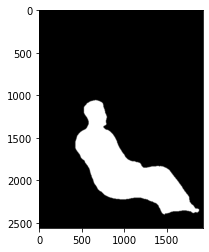

[[ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]]
[[False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False Fals

In [14]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함\
seg_color = (128,128,192)
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')#시각화 하려는 그래프에 입력이미지를 가져온다.
plt.show() #이미지를 시각화하여 보여준다.
#np.all(output==seg_color, axis=-1)` 이 부분은 NumPy의 `all` 함수를 사용하여 output 이미지의 모든 채널(RGB) 값이 seg_color와 같은지 비교하고, 그 결과를 Boolean 값으로 반환합니다. 
#`axis=-1`은 마지막 차원, 즉 채널 차원을 기준으로 연산을 수행하라는 의미입니다.

#따라서, 이 코드의 결과인 `seg_map`은 output 이미지에서 픽셀의 색상이 seg_color와 동일한 위치에서만 True, 그렇지 않은 위치에서는 False 값을 가지는 2차원 Boolean 배열이 됩니다. 
#이를 통해 이미지에서 특정 색상을 가진 영역을 쉽게 찾아낼 수 있습니다
#배열로 잘 바뀌어서 이미지를 분류하는지 측정(샘플링, 이미지의 픽셀값이 너무 크기때문)
print(seg_map[2000:2010,1500:1510])#이미지가 있는 픽셀부분을 슬라이싱해보니 TRUE값으로 잘 분류된것같다.
print(seg_map[:10, :10])#이미지가 없는 부분은 FALSE로 잘 분류된거같다.

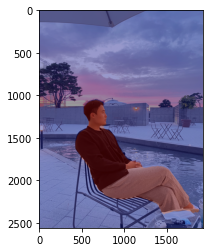

In [18]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255 # bool형태의 픽셀값을 수치형데이터로 스케일링

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스크를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

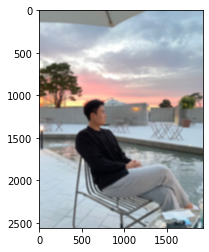

In [19]:
#배경 흐리게 만들기
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (26,26))#나중에 블러처리다른메서드 불러와서 진행해서 인물에대해 잘 흐려지게 시도해봐야겠다.

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

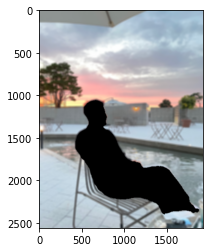

In [20]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

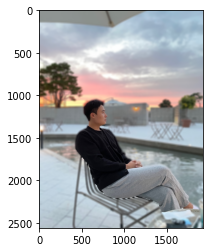

In [21]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

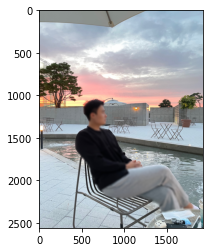

In [22]:
# Q. 이번에는 사람 부분을 블러로, 배경 부분을 원본으로 출력해볼까요?
# 힌트 : img_mask_color 옵션을 적절히 조정해주고, img_orig, img_orig_blur 를 활용하세요.
img_concat = np.where(img_mask_color==255, img_orig_blur, img_orig )
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

(1080, 1080, 3)


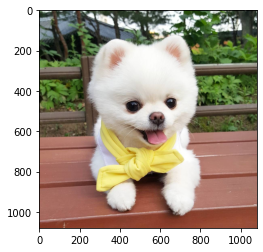

In [103]:
import cv2
import os
#위에 이미지의 경로설정중 환경변수와 경로 문제로 이미지가 불러와지지않아 join을 사용하여 다시 경로 설정함

# 경로를 명확하게 지정하기 위해 raw string을 사용하거나 슬래시를 사용합니다.
img_path2 = os.path.join(os.getenv('HOME'), 'aiffel', 'human_segmentation', 'images', '107425756bbfd5102867ed0f02c69095.jpg')

# 파일이 실제로 존재하는지 다시 확인합니다.
if os.path.isfile(img_path2):
    img_orig2 = cv2.imread(img_path2)
    if img_orig2 is not None:
        print(img_orig2.shape)
    else:
        print("이미지를 읽을 수 없습니다. 파일 형식을 확인하거나 OpenCV 설치를 확인하세요.")
else:
    print(f"파일이 존재하지 않습니다: {img_path2}")
plt.imshow(cv2.cvtColor(img_orig2, cv2.COLOR_BGR2RGB))#cv2.cvtColor를 통해 BRG 형태를 RGB형태로 바꿈..
plt.show()

In [104]:
segvalues, output = model.segmentAsPascalvoc(img_path2) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용

In [105]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

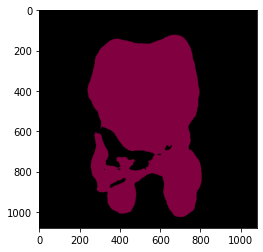

In [106]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

In [107]:
segvalues # segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력

{'class_ids': array([ 0, 12]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [108]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
dog


In [109]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!
#각 채널이 8비트를 사용하여 색상을 표현하기 때문에, 가능한 색상의 총 개수는 (2^8 = 256) 가지입니다.
#각 색상값의 범위는 0부터 255까지, 각 색상의 수는 256가지
#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [110]:
print(colormap[12])

[ 64   0 128]


(1080, 1080)


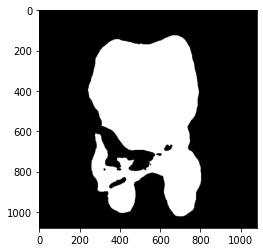

[[ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]]
[[False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False Fals

In [111]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함\
seg_color = (128,0,64)
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')#시각화 하려는 그래프에 입력이미지를 가져온다.
plt.show() #이미지를 시각화하여 보여준다.
#np.all(output==seg_color, axis=-1)` 이 부분은 NumPy의 `all` 함수를 사용하여 output 이미지의 모든 채널(RGB) 값이 seg_color와 같은지 비교하고, 그 결과를 Boolean 값으로 반환합니다. 
#`axis=-1`은 마지막 차원, 즉 채널 차원을 기준으로 연산을 수행하라는 의미입니다.

#따라서, 이 코드의 결과인 `seg_map`은 output 이미지에서 픽셀의 색상이 seg_color와 동일한 위치에서만 True, 그렇지 않은 위치에서는 False 값을 가지는 2차원 Boolean 배열이 됩니다. 
#이를 통해 이미지에서 특정 색상을 가진 영역을 쉽게 찾아낼 수 있습니다
#배열로 잘 바뀌어서 이미지를 분류하는지 측정(샘플링, 이미지의 픽셀값이 너무 크기때문)
print(seg_map[700:710,600:610])#이미지가 있는 픽셀부분을 슬라이싱해보니 TRUE값으로 잘 분류된것같다.
print(seg_map[:10, :10])#이미지가 없는 부분은 FALSE로 잘 분류된거같다.

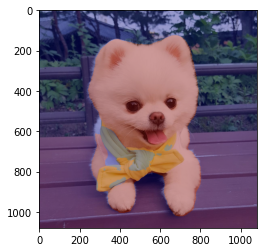

In [112]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig2.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255 # bool형태의 픽셀값을 수치형데이터로 스케일링

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

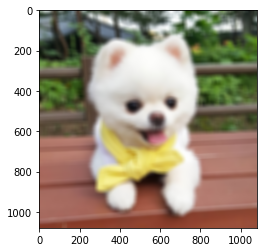

In [113]:
#배경 흐리게 만들기
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig2, (26,26))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

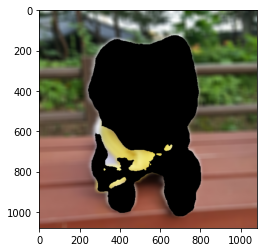

In [114]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

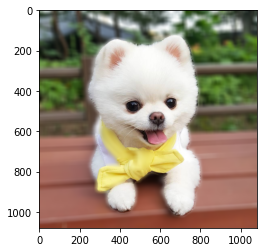

In [115]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color==255, img_orig2, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

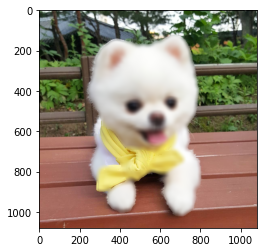

In [116]:
# Q. 이번에는 사람 부분을 블러로, 배경 부분을 원본으로 출력해볼까요?
# 힌트 : img_mask_color 옵션을 적절히 조정해주고, img_orig, img_orig_blur 를 활용하세요.
img_concat = np.where(img_mask_color==255, img_orig_blur, img_orig2 )
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

(2560, 1920, 3)


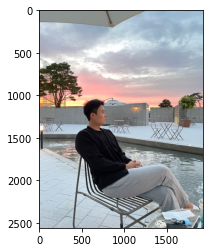

In [132]:
#크로마키 배경합성
#원본이미지 불러오기
import cv2
import os
#위에 이미지의 경로설정중 환경변수와 경로 문제로 이미지가 불러와지지않아 join을 사용하여 다시 경로 설정함

# 경로를 명확하게 지정하기 위해 raw string을 사용하거나 슬래시를 사용합니다.
img_path = os.path.join(os.getenv('HOME'), 'aiffel', 'human_segmentation', 'images', 'KakaoTalk_20240109_113309155.jpg')

# 파일이 실제로 존재하는지 다시 확인합니다.
if os.path.isfile(img_path):
    img_orig = cv2.imread(img_path)
    if img_orig is not None:
        print(img_orig.shape)
    else:
        print("이미지를 읽을 수 없습니다. 파일 형식을 확인하거나 OpenCV 설치를 확인하세요.")
else:
    print(f"파일이 존재하지 않습니다: {img_path}")
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))#cv2.cvtColor를 통해 BRG 형태를 RGB형태로 바꿈..
plt.show()

In [133]:
segvalues, output = model.segmentAsPascalvoc(img_path) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용

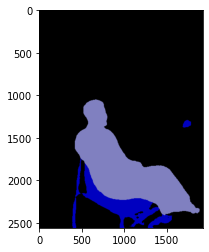

In [134]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

In [135]:
#위에 분리된 사람과 의자를 같이 가져옴
segvalues # segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!
#각 채널이 8비트를 사용하여 색상을 표현하기 때문에, 가능한 색상의 총 개수는 (2^8 = 256) 가지입니다.
#각 색상값의 범위는 0부터 255까지, 각 색상의 수는 256가지
#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력


background
chair
person


array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [136]:
#각각 segvalues, output = model.segmentAsPascalvoc(img_path)를 통해 분리된 이미지안의 객체들의 레이블값에 따라 픽셀값이 다르게 저장(각각 객체들 픽셀단위로 구분)
print(colormap[15]) #컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)
print(colormap[9]) #컬러맵 9에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 9번째인 의자)
print(colormap[0]) #컬러맵 0에 해당하는 배열 출력()pacalvoc에 LABEL_NAMES 0번째인 배경)

[192 128 128]
[192   0   0]
[0 0 0]


(220, 220, 3)


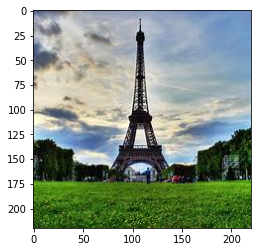

In [16]:
#합성할 배경이미지 불러오기
from importlib.metadata import version
import cv2
import pixellib
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt
#위에 이미지의 경로설정중 환경변수와 경로 문제로 이미지가 불러와지지않아 join을 사용하여 다시 경로 설정함

# 경로를 명확하게 지정하기 위해 raw string을 사용하거나 슬래시를 사용합니다.
img_new_background = os.path.join(os.getenv('HOME'), 'aiffel', 'human_segmentation', 'images', 'th.jpg')

#파일이 실제로 존재하는지 다시 확인합니다.
if os.path.isfile(img_new_background):
    img_new_background = cv2.imread(img_new_background)
    if img_new_background is not None:
        print(img_new_background.shape)
    else:
        print("이미지를 읽을 수 없습니다. 파일 형식을 확인하거나 OpenCV 설치를 확인하세요.")
else:
    print(f"파일이 존재하지 않습니다: {img_new_background}")
plt.imshow(cv2.cvtColor(img_new_background, cv2.COLOR_BGR2RGB))#cv2.cvtColor를 통해 BRG 형태를 RGB형태로 바꿈..
plt.show()

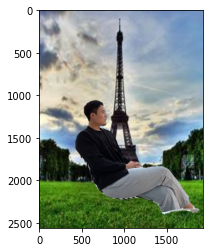

In [25]:
img_concat = np.where(img_mask_color==255, img_orig, img_new_background)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()
#사람뿐만아니라 원본이미지에서 다른클래스객체인 의자도 같이 가져오고싶었다.

In [59]:
# 사람과 의자에 해당하는 클래스 인덱스를 찾음
person_index = 1  # 사람 클래스 인덱스
chair_index = 2   # 의자 클래스 인덱스

# output 배열에서 사람에 해당하는 픽셀을 찾음
person_pixels = np.where(output == person_index)

# output 배열에서 의자에 해당하는 픽셀을 찾음
chair_pixels = np.where(output == chair_index)

# 사람과 의자에 해당하는 픽셀의 값을 확인
print("사람 픽셀 값:", output[person_pixels][0] if person_pixels[0].size > 0 else "사람 클래스 없음")
print("의자 픽셀 값:", output[chair_pixels][0] if chair_pixels[0].size > 0 else "의자 클래스 없음")



사람 픽셀 값: 1
의자 픽셀 값: 2


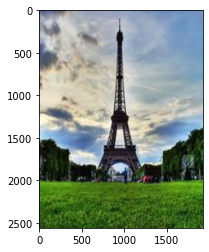

In [60]:
# img_concat = np.where(img_mask_color==510, img_orig, img_new_background)
# # plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# # cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# # cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# # 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
# plt.show()

##의자만따로 했을때 합성이 안되는 이유는 위에 맨처음 앞부분에 사람은 true로 지정하엿고 의자는 따로 segmap에 따로 지정을 해주지않아 의자는 안불러와졌다.
##의자를 따로 segmap을 진행해서 의자만 true로 만든것을 가지고있다면 의자만 분류되어 합성됬을거같다.

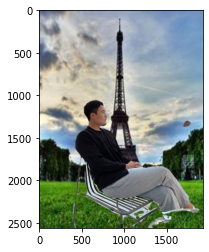

In [57]:
# 의자에 해당하는 마스크 생성 (여기서는 의자의 seg_color가 [192, 0, 0]라고 가정)
mask_chair = np.all(output == [0, 0, 192], axis=-1)

# 사람과 의자의 결합된 마스크 생성
mask_person_or_chair = np.logical_or(mask_person, mask_chair)

# 결합된 마스크를 사용하여 원본 이미지에서 사람과 의자 부분 추출
img_person_and_chair = np.where(mask_person_or_chair[:, :, np.newaxis], img_orig, img_new_background)

# 색상 채널 변경 (BGR to RGB) 및 결과 이미지 표시
plt.imshow(cv2.cvtColor(img_person_and_chair, cv2.COLOR_BGR2RGB))
plt.show()
#

In [28]:
img_new_background.shape

(2560, 1920, 3)

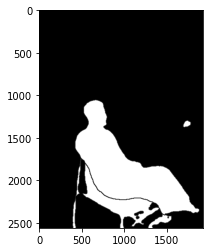

In [61]:
# 사람과 의자마스크 만들기.
# 여기서는 예시로 사람의 seg_color를 (128, 128, 192), 의자의 seg_color를 (192, 0, 0)로 가정합니다.
seg_color_person = (128, 128, 192)
seg_color_chair = (0, 0, 192)

# output 배열에서 사람과 의자 색상에 해당하는 픽셀을 True로 설정합니다.
mask_person = np.all(output == seg_color_person, axis=-1)
mask_chair = np.all(output == seg_color_chair, axis=-1)

# 사람과 의자에 대한 마스크를 결합합니다.
# mask_person_or_chair = np.logical_or(mask_person, mask_chair)
mask_person_or_chair = mask_person + mask_chair

# 이제 mask_person_or_chair에는 사람과 의자 위치가 True, 나머지 배경은 False로 표시됩니다.
# 이진 마스크를 시각화해봅니다.
plt.imshow(mask_person_or_chair, cmap='gray')
plt.show()


In [51]:
print(seg_map[2000:2050,600:650])#이미지가 있는 픽셀부분을 슬라이싱해보니 TRUE값으로 잘 분류된것같다.
# print(seg_map[:10, :10])#이미지가 없는 부분은 FALSE로 잘 분류된거같다
print(mask_person_or_chair.shape)

[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]]
(2560, 1920)


In [40]:
print(seg_map[700:710,600:610])
print(seg_map[:10, :10])

[[False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]]
[[False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False Fals

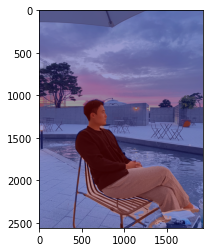

In [52]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = mask_person_or_chair.astype(np.uint8) * 255 # bool형태의 픽셀값을 수치형데이터로 스케일링, #이미 위에서 의자와 사람이 합쳐져서 true값을 반환.

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스크를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

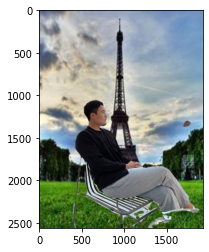

In [56]:
import cv2
import numpy as np

import cv2
import numpy as np
import matplotlib.pyplot as plt

# # 원본 이미지를 불러옵니다.
# img_orig

# # 새로운 배경 이미지를 불러옵니다.
# img_new_background

# 새 배경 이미지의 크기를 원본 이미지와 동일하게 조정합니다.
img_new_background = cv2.resize(img_new_background, (img_orig.shape[1], img_orig.shape[0]))

# 원본 이미지의 사람과 의자에 해당하는 색상 코드를 컬러맵에서 찾습니다.
# 예시로 사람은 (128, 128, 192), 의자는 (192, 0, 0)으로 가정합니다.
person_color = (128, 128, 192)  # 사람 색상 코드
chair_color = (0, 0, 192)       # 의자 색상 코드

# 사람과 의자가 아닌 배경만을 위한 마스크를 생성합니다.
mask_background = np.logical_not(mask_person_or_chair)

# 마스크의 데이터 타입을 uint8로 변환합니다.
mask_background_uint8 = mask_background.astype(np.uint8)
mask_person_or_chair_uint8 = mask_person_or_chair.astype(np.uint8)

# 새 배경 이미지에서 배경 부분만 추출합니다.
background_from_new = img_new_background * mask_background_uint8[:, :, np.newaxis]

# 원본 이미지에서 사람과 의자 부분만 추출합니다.
person_and_chair_from_orig = img_orig * mask_person_or_chair_uint8[:, :, np.newaxis]

# 두 이미지를 합쳐 최종 이미지를 생성합니다.
combined_img = background_from_new + person_and_chair_from_orig

# 최종 이미지를 표시합니다.
plt.imshow(cv2.cvtColor(combined_img, cv2.COLOR_BGR2RGB))
# plt.axis('off')  # 축을 표시하지 않습니다.
plt.show()



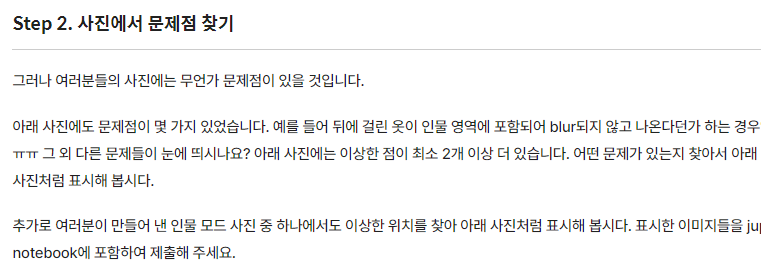
- 사진에서 문제점으로는 분류가 처음에 잘 이루어지지않았다
- 원하는 부분만 분류하고 싶었지만 semantic segmentation을 진행하면 같은 클래스의 개체들은 하나로 묶인다.
- 블러처리가 배경에서는 넓어서 잘되지만 사람부분에서나 동물부분의 스카프부분은 잘 되지않았다.(깔끔하지 않았다)

## 사진에서 문제점
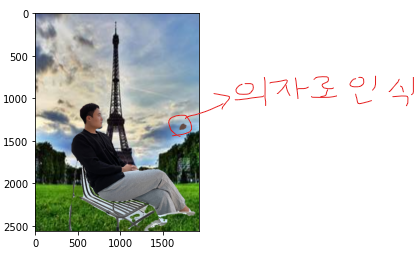
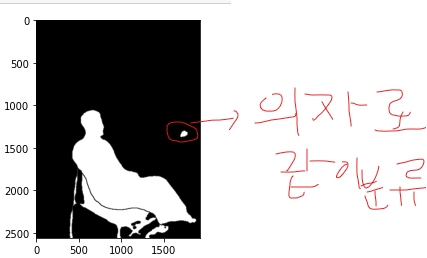
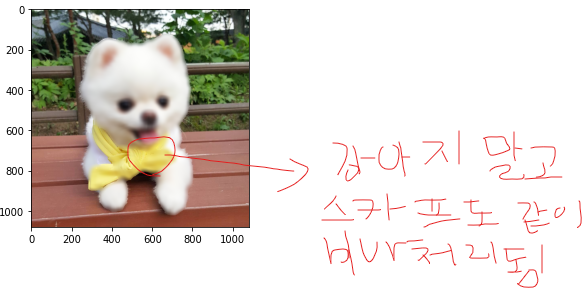
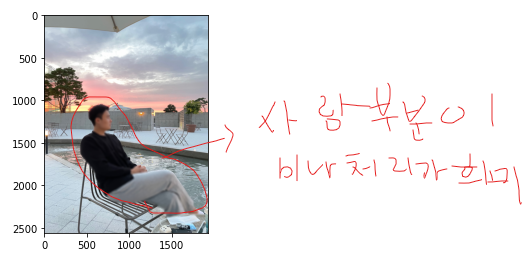

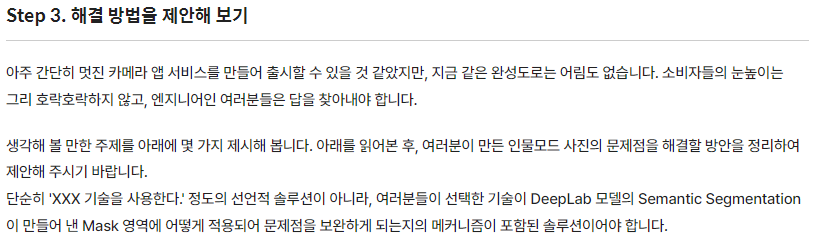
- 문제점해결로 instance segmentation을 진행하여 원하는 클래스의 객체들만 가져오는방법
- 이미지데이터를 좀더 구분이 명확한 데이터를 가져오는방법..
- 경계를 더 잘 나타내기위해 커널사이즈를 조절하는방법
- 데이터가 더 잘 학습되있거나 많은 데이터를 학습한 복잡한 모델을 가져와서 시도하면 객체들이 더 명확하게 잘 분류될거같다.
- 본인은 해결방법으로 사람의 클래스에 가까이 근접해있는 다른 클래스의 객체를 같이 mask하여 불러오는 방법을 택했다. 방법을 택한이유는 사람이라는 클래스가 명확히 분류가 되지않을때 근접해있는 다른 객체들을 같이 불러왔을때 명확하게 분류가 되는지 궁금해서 한번 시도해보았다. 사람과 의자에 대한 클래스가 잘 분리된것을 알수있었다.

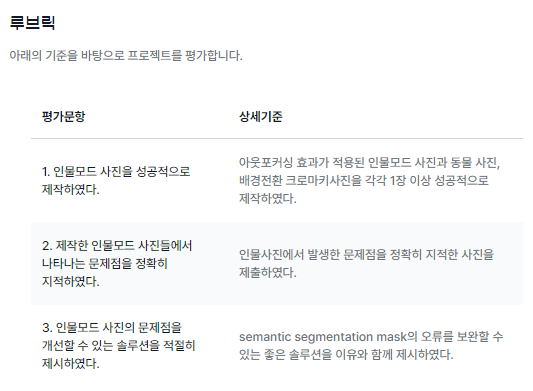

## 회고
- k:기존의 semantic segmentation뿐만아니라 다른것들을 시도하고 문제점을 해결하려고 노력하였다.
- p:의자와 사람의 클래스를 각각 분리해서 배경을 바꾸고싶엇는대 오류가 계속나거나 사람만 불러와졌다.. 그래서 의자를 불러오는 마스크를 수정하고 사람마스크와 합쳤더니 해결되었다. 동물사진에서는 동물에 같이있는 스카프가 따로 모델의 라벨링이 되어있지않아 블러처리를 해도 잘 되지않았다. 의자를 분류할대는 의자뿐만아니라 다른것들도 의자로 인식해서 불러와지는 문제가있었다.
- t: instance segmentation을 통해 시도해서 의자부분을 더 명확이 나타내보아야겠다. blur처리의 다른 함수를 불러와서 더 잘 blur처리되게 시도해보아야겠다. 동물부분의 스카프를 blur처리가 강아지와 같이 안되게 하는 방법을 시도해보아야겠다. 도다른 해결방법이 있는지 찾아보고 시도해보아야겠다.